# Imports

In [35]:
import statsmodels as ss
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Section 1: Stationary Time Series

In this lesson, we will explore stationary time series. Specifically, we'll discuss what it means for time series to be stationary and show examples of a few time series that are not stationary.

As before, we'll generate datasets from scratch to help you establish a deeper understanding of what it means for time series data to be stationary or nonstationary. 

In [36]:
# reproducibility
np.random.seed(42)

# data
time = np.arange(100)
stationary = np.random.normal(loc=0, scale=1.0, size=len(time))

In [37]:
def run_sequence_plot(x, y, title, xlabel="time", ylabel="series"):
    plt.plot(x, y, 'k-')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.3);

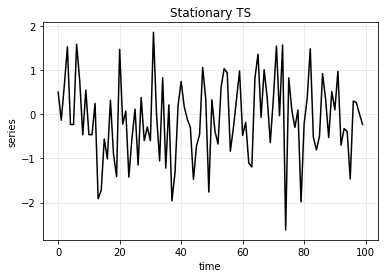

In [38]:
run_sequence_plot(time, stationary, "Stationary TS")

### Autocorrelation Structure

In [39]:
# seed to start series
seed = 3.14

# create autocorrelation data
lagged = np.empty_like(time, dtype='float')
for t in time:
    lagged[t] = seed + np.random.normal(loc=0, scale=2.5, size=1)
    seed = lagged[t]

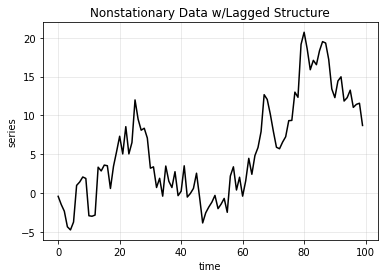

In [40]:
run_sequence_plot(time, lagged, "Nonstationary Data w/Lagged Structure")

Notice how the current value is highly correlated with the past value?

At this point you're probably wondering how to check if a time series in fact meets the four conditions of stationarity. We'll learn in Section #2 how to check that. However, starting your analysis with a run-sequence plot is an effective way to get a handle on whether your data has the appearance of being stationary. 

To drive that point home, let's discuss some ways to generate nonstationary time series:
1. **Trend** (changing mean)
2. **Heteroscedasticity** (changing variance)
3. **Seasonality** (periodic component)
4. **Trend + Seasonality**

Naturally, we'll plot the results of each so we can compare nonstationary to stationary data. 

### Trend

In [42]:
trend = (time * 2.75) + stationary

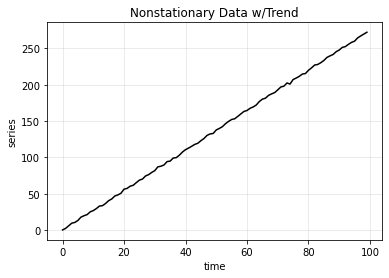

In [45]:
run_sequence_plot(time, trend, "Nonstationary Data w/Trend")

**Question:** Why is this data not stationary?

**Answer:** The mean changes over time.

#### Heteroscedasticity

In [46]:
# reproducibility
np.random.seed(1234)

# data
level_1 = np.random.normal(loc=0, scale=1.0, size=50)
level_2 = np.random.normal(loc=0, scale=10.0, size=50)
heteroscedasticity = np.append(level_1, level_2)

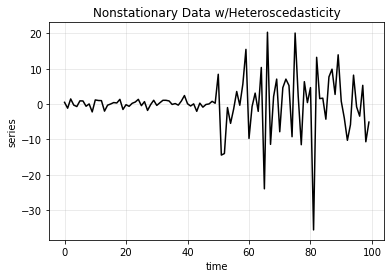

In [47]:
run_sequence_plot(time, heteroscedasticity, "Nonstationary Data w/Heteroscedasticity")

**Question:** Why is this data not stationary?

**Answer:** The variance changes over time.

#### Seasonality

In [50]:
seasonality = 10 + np.sin(time) * 10

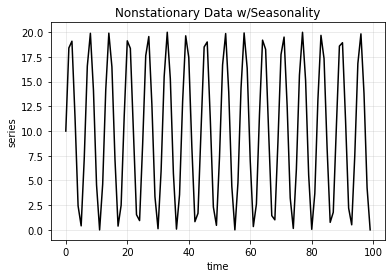

In [51]:
run_sequence_plot(time, seasonality, "Nonstationary Data w/Seasonality")

**Question:** Why is this data not stationary?

**Answer:** There is a periodic component.

### Trend + Seasonality

In [60]:
trend_seasonality = trend + seasonality + stationary

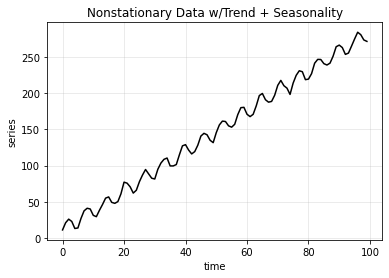

In [61]:
run_sequence_plot(time, trend_seasonality, "Nonstationary Data w/Trend + Seasonality")

**Question:** Why is this data not stationary?

**Answer:** The mean changes over time and there is a periodic component.

### Exercise #1
In this exercise, your task is to:
1. Create a time variable called **mytime** that is componed of the integers from 0 to 99 inclusive.  
2. Read in **dataset_SNS_1.npy** and **dataset_SNS_2.npy** as **dataset_SNS_1** and **dataset_SNS_2**, respectively. 
3. Plot each time series dataset.
4. Start thinking about whether each is stationary or nonstationary. 

In [63]:
mytime = np.arange(100)
len(mytime)

100

In [64]:
# get data
path_to_file = "./"
dataset_SNS_1 = np.load(path_to_file + "dataset_SNS_1.npy")
dataset_SNS_2 = np.load(path_to_file + "dataset_SNS_2.npy")

In [65]:
dataset_SNS_1

array([ 4.71435164e-01, -1.19097569e+00,  1.43270697e+00, -3.12651896e-01,
       -7.20588733e-01,  8.87162940e-01,  8.59588414e-01, -6.36523504e-01,
        1.56963721e-02, -2.24268495e+00,  1.15003572e+00,  9.91946022e-01,
        9.53324128e-01, -2.02125482e+00, -3.34077366e-01,  2.11836468e-03,
        4.05453412e-01,  2.89091941e-01,  1.32115819e+00, -1.54690555e+00,
       -2.02646325e-01, -6.55969344e-01,  1.93421376e-01,  5.53438911e-01,
        1.31815155e+00, -4.69305285e-01,  6.75554085e-01, -1.81702723e+00,
       -1.83108540e-01,  1.05896919e+00, -3.97840228e-01,  3.37437654e-01,
        1.04757857e+00,  1.04593826e+01,  8.63717292e+00, -1.22091575e+00,
        1.24712954e+00, -3.22794806e+00,  8.41674713e+00,  2.39096052e+01,
        7.61995878e-01, -5.66445930e+00,  3.61419367e-01, -2.07497760e+01,
        2.47792200e+00, -8.97156784e+00, -1.36794833e+00,  1.82891913e-01,
        7.55413982e+00,  2.15268581e+00,  8.41008795e+00, -1.44581008e+01,
       -1.40197328e+01, -

In [66]:
dataset_SNS_2

array([-1.23429642,  2.3126606 ,  3.47205141,  4.65373251,  3.00821054,
        1.33418806,  0.75562612,  2.28534997,  5.78981178,  5.80882041,
        4.28763806,  6.78136023,  7.03652616, 12.10118532, 11.56873   ,
       13.07663676, 11.86926509, 12.19738549, 13.25492579, 12.93465089,
       10.96327158, 13.86629905, 12.71052658, 14.53242702, 16.37548307,
       16.7155002 , 19.09261616, 18.59046704, 19.36298396, 18.01570672,
       16.310212  , 17.55097496, 17.36585519, 18.72521272, 20.3246281 ,
       23.28059027, 22.24518548, 22.3207084 , 19.00253187, 20.19929078,
       18.43782593, 18.45129127, 20.60526263, 24.10656559, 22.93022627,
       24.52952978, 23.82144511, 27.85918722, 27.03446049, 24.90173291,
       24.77770127, 23.63329676, 24.24176062, 23.27081479, 21.86266025,
       26.19639274, 25.76680557, 25.14352327, 24.82296482, 26.36311704,
       26.01638338, 26.04155793, 25.05534391, 21.93983406, 23.22234694,
       23.56628093, 26.11597465, 27.67225518, 28.46588362, 27.33

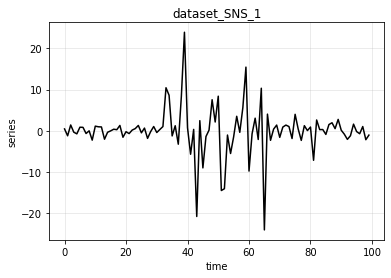

In [69]:
run_sequence_plot(mytime, dataset_SNS_1, "dataset_SNS_1")

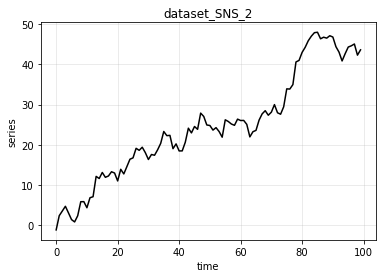

In [70]:
run_sequence_plot(mytime, dataset_SNS_2, "dataset_SNS_2")

#### Your Preliminary Thoughts
Are both datasets stationary or is one stationary and one nonstationary or are both nonstationary? 

**dataset_SNS_1** has heteroscedasticity (non-constant variance). We can see three distinct regions of variance - a small one for the first 33 values, a large one for the next 33, and a medium variance for the remaining 34.

**dataset_SNS_2** has a changing mean (trend/autocorrelation) which is clearly not stationary.

### Run-Sequence Plots
Run-sequence plots should be old hat by now. They are the go-to technique to visualize what's happening with your data. You should always start here. Don't bother building a model until you've done this.

In order to be thorough, let's plot the nonstationary data from above that has trend and seasonality components.

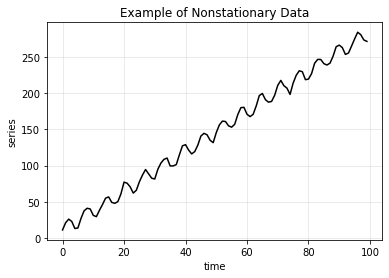

In [71]:
run_sequence_plot(time, trend_seasonality, title="Example of Nonstationary Data")

### Summary Statistics & Plots

Perhaps the easiest way to check for constant mean and variance is to chop up the data into separate chunks, calculate statistics for each chunk, and compare. It's not the most rigorous method but it gives you a good sense of whether your data is approximately stationary.

Let's look at an example using the *trend* data we created in the last section.

In [72]:
# split data into 10 chunks
chunks = np.split(trend, indices_or_sections=10)

In [74]:
trend

array([  0.49671415,   2.6117357 ,   6.14768854,   9.77302986,
        10.76584663,  13.51586304,  18.07921282,  20.01743473,
        21.53052561,  25.29256004,  27.03658231,  29.78427025,
        33.24196227,  33.83671976,  36.77508217,  40.68771247,
        42.98716888,  47.06424733,  48.59197592,  50.8376963 ,
        56.46564877,  57.5242237 ,  60.5675282 ,  61.82525181,
        65.45561728,  68.86092259,  70.34900642,  74.62569802,
        76.39936131,  79.45830625,  81.89829339,  87.10227818,
        87.98650278,  89.69228907,  94.32254491,  95.02915635,
        99.2088636 ,  99.79032988, 103.17181395, 107.44686124,
       110.73846658, 112.92136828, 115.38435172, 117.9488963 ,
       119.52147801, 123.03015579, 126.03936123, 130.30712223,
       132.34361829, 132.98695984, 137.82408397, 139.86491772,
       142.323078  , 146.36167629, 149.53099952, 152.18128012,
       153.16078248, 156.44078762, 159.83126343, 163.22554513,
       164.52082576, 167.56434102, 169.39366503, 172.05

In [73]:
chunks

[array([ 0.49671415,  2.6117357 ,  6.14768854,  9.77302986, 10.76584663,
        13.51586304, 18.07921282, 20.01743473, 21.53052561, 25.29256004]),
 array([27.03658231, 29.78427025, 33.24196227, 33.83671976, 36.77508217,
        40.68771247, 42.98716888, 47.06424733, 48.59197592, 50.8376963 ]),
 array([56.46564877, 57.5242237 , 60.5675282 , 61.82525181, 65.45561728,
        68.86092259, 70.34900642, 74.62569802, 76.39936131, 79.45830625]),
 array([ 81.89829339,  87.10227818,  87.98650278,  89.69228907,
         94.32254491,  95.02915635,  99.2088636 ,  99.79032988,
        103.17181395, 107.44686124]),
 array([110.73846658, 112.92136828, 115.38435172, 117.9488963 ,
        119.52147801, 123.03015579, 126.03936123, 130.30712223,
        132.34361829, 132.98695984]),
 array([137.82408397, 139.86491772, 142.323078  , 146.36167629,
        149.53099952, 152.18128012, 153.16078248, 156.44078762,
        159.83126343, 163.22554513]),
 array([164.52082576, 167.56434102, 169.39366503, 172.0537

### Summary Status

In [81]:
# Compare means and variances
print("{} | {:7} | {}".format("Chunk", "Mean", "Variance"))
print("-" * 26)

for i, chunk in enumerate(chunks, 1):
    print("{:5} | {:.6} | {:.6}".format(i, np.mean(chunk), np.var(chunk)))

Chunk | Mean    | Variance
--------------------------
    1 | 12.8231 | 62.548
    2 | 39.0843 | 60.8662
    3 | 67.1532 | 58.7456
    4 | 94.5649 | 57.2321
    5 | 122.122 | 58.9505
    6 | 150.074 | 65.1111
    7 | 177.36 | 67.7091
    8 | 204.827 | 54.8101
    9 | 232.476 | 62.6766
   10 | 259.726 | 61.6424


#### Tangent
There's a nice shortcut method in NumPy to get the same results without having to run through a for loop. 

In [82]:
np.mean(chunks, axis=1)

array([ 12.82306111,  39.08434177,  67.15315644,  94.56489333,
       122.12217783, 150.07444143, 177.35994301, 204.82726388,
       232.47644743, 259.72580861])

In [83]:
np.var(chunks, axis=1)

array([62.54798758, 60.86616531, 58.74556884, 57.2320973 , 58.9505395 ,
       65.11109596, 67.70905522, 54.81013753, 62.67659981, 61.642402  ])

#### Explanation

While the variance is relatively constant over time, the mean is clearly changing which means this data is not stationary. 

> Note: We do expect some fluctuation in values. It's highly unlikely that the either the mean or variace will be exactly the same from chunk to chunk, but it should be close. 

If you wanted to get even more sophisticated, you could run a statistical test to determine if the difference in means or the difference in variances is statistically significant. That is beyond the scope of this tutorial, however.

Another useful tool is to plot the means and variances.

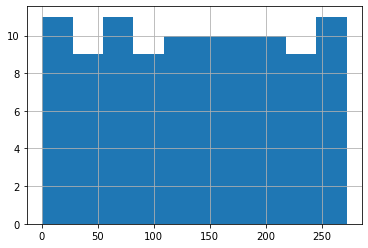

In [87]:
pd.Series(trend).hist();

NameError: name 'a' is not defined

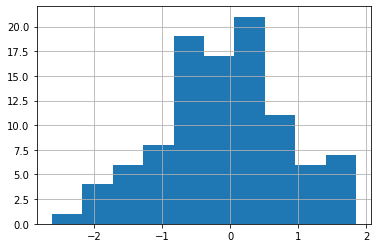

In [88]:
pd.Series(stationary).hist();a

Plotting a histogram of the time series gives important clues into its underlying structure. A Normal distribution gives confidence that mean and variance are constant. It's certainly not definitive but gives you a good indication. 

Here we see what appears to be a uniform distribution. As we would expect for time series with trend, this data is not stationary and the histogram plot provides insight into that fact.

Let's try the same thing on the *stationary* data we created way back at the beginning. 

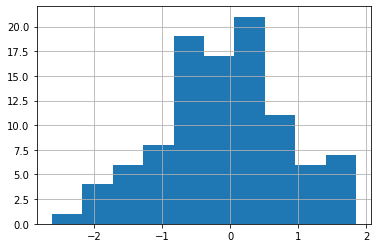

In [89]:
pd.Series(stationary).hist();

That definitely looks more approximately Normal. 

While again out of scope, we could use SciPy's [normaltest](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.mstats.normaltest.html) to check whether this sample differs from a Normal distribution.